<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [118]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

In [119]:
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
filename = 'm4_survey_data.sqlite'

r = requests.get(url)

with open(filename, 'wb') as f:
    f.write(r.content)

Connect to the database.


In [120]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [121]:
import pandas as pd

## Demo: How to run an sql query


In [122]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [123]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [124]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [125]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [126]:
# Define the table name
table_name = 'master'

# Execute the query to get column metadata
query = f"PRAGMA table_info({table_name})"
result = conn.execute(query)

# Count the number of rows in the result set
num_columns = len(result.fetchall())

# Print the number of columns
print(f"The {table_name} table has {num_columns} columns.")

The master table has 63 columns.


In [127]:
# Extract the column names from the result set
column_names = [row[1] for row in result]

# Print the column names
print(f"The {table_name} table has columns: {', '.join(column_names)}")

The master table has columns: 


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

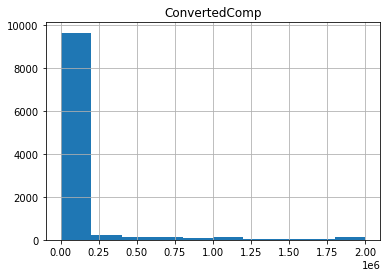

In [128]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
pd.read_sql_query(QUERY, conn).hist()

<AxesSubplot:ylabel='Count'>

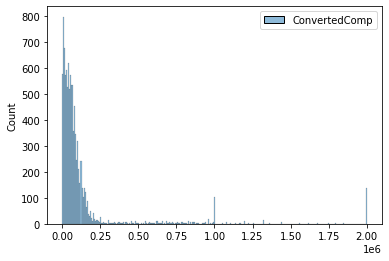

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """
SELECT ConvertedComp
FROM master
"""
sns.histplot(pd.read_sql_query(QUERY, conn))

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

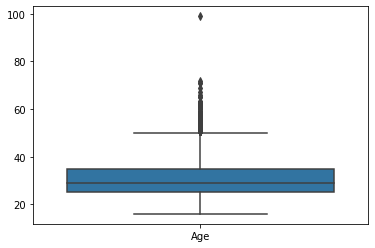

In [130]:
# your code goes here
QUERY = """
SELECT Age 
FROM master
"""
sns.boxplot(pd.read_sql_query(QUERY, conn))


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

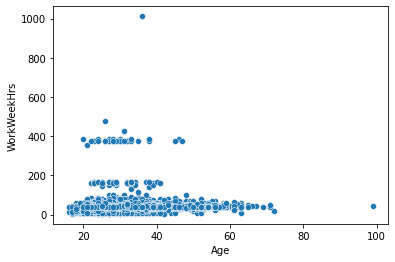

In [131]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
sns.scatterplot(data=df, x='Age', y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

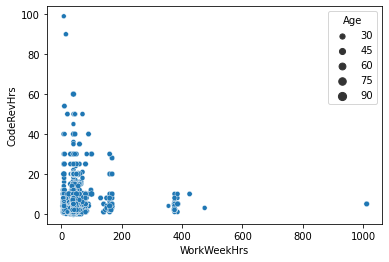

In [132]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
sns.scatterplot(data=df, x='WorkWeekHrs', y='CodeRevHrs', size="Age")

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


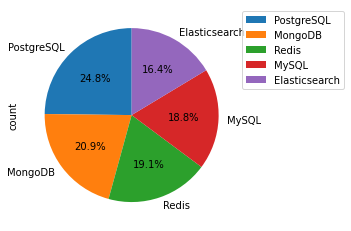

In [133]:
QUERY ="""
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count(*) DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='pie', y='count', labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.show()

In [134]:
# Question 2: In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*)
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count(*) DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
df

,LanguageDesireNextYear,COUNT(*)
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [135]:
# Question 3: How many respondents indicated that they currently work with 'SQL'? 
QUERY = """
SELECT LanguageWorkedWith, COUNT(*)
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = 'SQL'
GROUP BY LanguageWorkedWith
"""
pd.read_sql_query(QUERY, conn) 

,LanguageWorkedWith,COUNT(*)
0,SQL,7106


In [136]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*)
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""
df = pd.read_sql_query(QUERY, conn)
df 

,LanguageWorkedWith,COUNT(*)
0,Assembly,437
1,Bash/Shell/PowerShell,4642
2,C,1578
3,C#,4288
4,C++,1946
5,Clojure,164
6,Dart,237
7,Elixir,187
8,Erlang,98
9,F#,158


In [137]:
# create a CTE, with repondents record MYSQL, then count DatabaseWorkedWith on those respondents only and filter for 1 
QUERY = """
SELECT Respondent, COUNT(DatabaseWorkedWith) as count
FROM DatabaseWorkedWith
WHERE Respondent IN (
    SELECT DISTINCT Respondent
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith = 'MySQL'
)
GROUP BY Respondent
HAVING COUNT(DatabaseWorkedWith) = 1
"""
len(pd.read_sql_query(QUERY, conn))

474

In [138]:
# create a CTE, with repondents record MYSQL, then count LanguageWorkedWith on those respondents only and filter for 1 
QUERY = """
SELECT DISTINCT Respondent
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
"""
df = pd.read_sql_query(QUERY, conn)
df 

,Respondent
0,4
1,13
2,16
3,19
4,22
...,...
5464,25111
5465,25120
5466,25124
5467,25134


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

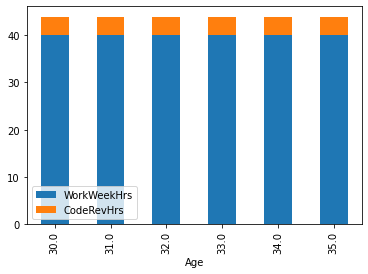

In [139]:
QUERY = """
SELECT  Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY, conn)
df.groupby('Age').agg({'WorkWeekHrs': 'median', 'CodeRevHrs': 'median'}).plot(kind='bar', stacked=True)


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

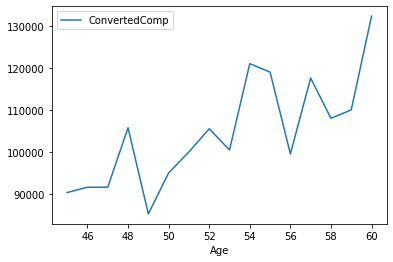

In [140]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(QUERY, conn)
df.groupby('Age').median().plot(kind='line')

<AxesSubplot:xlabel='Age'>

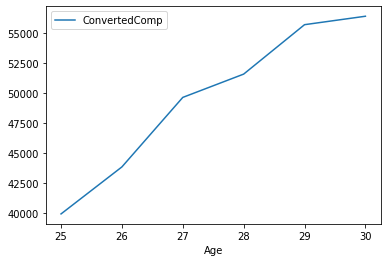

In [148]:
### Question 2: Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""

df = pd.read_sql_query(QUERY, conn)
df.groupby('Age').median().plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

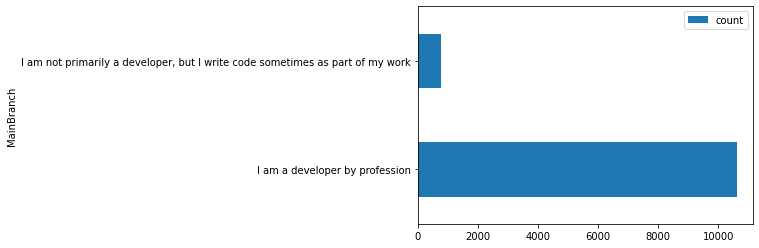

In [141]:
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY, conn)
df.set_index('MainBranch').plot(kind='barh')

In [147]:
# Majority of the survey responders are
QUERY = """
SELECT DevType, count(*)
FROM DevType
GROUP BY DevType
ORDER BY COUNT(*) DESC 
LIMIT 1
"""
pd.read_sql_query(QUERY, conn)

,DevType,count(*)
0,"Developer, full-stack",6928


Close the database connection.


In [142]:
# conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
